# Wind Turbine Accidents: A Data Mining Study

### Imports

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats
import scipy.special as sp
from scipy.stats import norm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import fowlkes_mallows_score

In [49]:
raw_dataset = pd.read_csv('News.Database.csv')

In [50]:
pd.set_option('display.max_columns', None)

raw_dataset.head()

,Accident No,Accident type,Site/area\n,Country\n,Details\n,Web reference/link\n,Year,Month,Day,Turbine Type,Manufacturer,Power of Turbine (KW),PowerOfWindFarm (KW),Offshore,During Construction,FULL-DATE,Outcome,Death,Fire,Injury,Mechanical,Structural Break,Transport Accident,Component,Cause,CauseCategory,Source Database,Source of the News,Title of the article
0,1.0,Wind,Tjaereborg,Denmark,Damage to all 3 blades,http://www.modernpowersystems.com/story.asp?st...,2002,11,4,Vestas 2000 KW,Vestas,2000,19000,1,0,"April 11, 2002",Structural break,0.0,0.0,0.0,0.0,1.0,0.0,Blade,Human (interference in control systems),Human,LexisNexis,Major World Publications,Bending with the wind
1,2.0,Wind,Jiangsu,China,5 died & 4 injured workers,http://www.chinadaily.com.cn/china/2012-03/11/...,2012,3,10,UNKNOWN,UNKNOWN,UNKNOWN,5000,1,1,"October 3, 2012",Structural break,1.0,0.0,1.0,0.0,1.0,0.0,UNKNOWN,Mechanical (platform collapse at construction ...,Mechanical,LexisNexis,Modern Power System,Death toll in China construction site accident...
2,3.0,Wind,Ireland,UK,The turbine came loose after bolts attaching i...,http://www.modernpowersystems.com/story.asp?st...,2009,1,UNKNOWN,Enercon 2000 KW,Enercon,2000,4000,0,0,UNKNOWN,Structural break,0.0,0.0,0.0,1.0,1.0,0.0,Bolt,Mechanical (material fatigue),Mechanical,LexisNexis,The Sunday Telegraph,ET 'not to blame'
3,4.0,Wind,"Berwickshire, Scotland",UK,A 30m turbine near Coldingham was deliberately...,http://www.windbyte.co.uk/safety.html,2011,12,7,Hannevind 22 KW,Hannevind,22,UNKNOWN,0,0,"December 7, 2011",Mechanical,0.0,0.0,0.0,1.0,0.0,0.0,Tower,Mechanical ( blade system failure),Mechanical,Google,windbyte.co.uk,Wind turbine safety
4,5.0,Wind,Ohio,USA,The fallen wind turbine was supplying power to...,http://www.vindy.com/news/2011/apr/11/wind-tur...,2011,4,10,Proven 15 KW,Proven,15,45,0,0,"April 11, 2011",Structural break,0.0,0.0,0.0,0.0,1.0,0.0,Tower,UNKNOWN,UNKNOWN,LexisNexis,vindy.com,Wind turbine failure western reserve high scho...


In [51]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Accident No            273 non-null    float64
 1   Accident type          273 non-null    object 
 2   Site/area
             273 non-null    object 
 3   Country
               273 non-null    object 
 4   Details
               273 non-null    object 
 5   Web reference/link
    273 non-null    object 
 6   Year                   273 non-null    object 
 7   Month                  273 non-null    object 
 8   Day                    273 non-null    object 
 9   Turbine Type           273 non-null    object 
 10  Manufacturer           273 non-null    object 
 11  Power of Turbine (KW)  273 non-null    object 
 12  PowerOfWindFarm (KW)   273 non-null    object 
 13  Offshore               83 non-null     object 
 14  During Construction    83 non-null     object 
 15  FULL-D

In [52]:
raw_dataset['Afectted Humans'] =raw_dataset['Death'] + raw_dataset['Injury']
raw_dataset['Afectted Humans'] = raw_dataset['Afectted Humans'].map({2.0: 1.0, 1.0:1.0,0.0:0.0})

raw_dataset['Affected System/Equipment'] =raw_dataset['Fire'] + raw_dataset['Structural Break'] + raw_dataset['Transport Accident']
raw_dataset['Affected System/Equipment'] = raw_dataset['Affected System/Equipment'].map({3.0:1.0,2.0: 1.0, 1.0:1.0,0.0:0.0})

#raw_dataset['Event Ocurrence'] =raw_dataset['During Construction'].map({1.0:"During Construction"})

raw_dataset.columns = ['Onshore/Offshore' if x=='Offshore' else x for x in raw_dataset.columns]
raw_dataset['Onshore/Offshore'] = raw_dataset['Onshore/Offshore'].map({"1":"Offshore","0":"Onshore"})

raw_dataset = raw_dataset.drop('Accident No', axis=1)
raw_dataset = raw_dataset.drop('Accident type', axis=1) 
raw_dataset = raw_dataset.drop('Source Database', axis=1)
raw_dataset = raw_dataset.drop('Source of the News', axis=1)
raw_dataset = raw_dataset.drop('Title of the article', axis=1)
raw_dataset = raw_dataset.drop('Web reference/link\n', axis=1)

raw_dataset.columns = ['Site/area' if x=='Site/area\n' else x for x in raw_dataset.columns]
raw_dataset.columns = ['Country' if x=='Country\n' else x for x in raw_dataset.columns]
raw_dataset.columns = ['Details' if x=='Details\n' else x for x in raw_dataset.columns]
#raw_dataset.columns = ['Web reference/link' if x=='Web reference/link\n' else x for x in raw_dataset.columns]

raw_dataset['Onshore/Offshore'] = raw_dataset['Onshore/Offshore'].fillna("0")
raw_dataset['During Construction'] = raw_dataset['During Construction'].fillna("0")

df = raw_dataset.copy()

df.drop(df[df.isnull().sum(axis=1) > 7].index, inplace=True)

yDeath = df['Death']
yInjury = df['Injury']

df = df.drop('Death', axis=1)
df = df.drop('Injury', axis=1)

In [53]:
enc = OrdinalEncoder()
enc.fit(df[["Site/area","Country", "Details", "Year", "Month", "Day", "Turbine Type", "Manufacturer", "Power of Turbine (KW)", "PowerOfWindFarm (KW)", "Onshore/Offshore", "During Construction", "FULL-DATE", "Outcome", "Component", "Cause", "CauseCategory"]])
df[["Site/area","Country", "Details", "Year", "Month", "Day", "Turbine Type", "Manufacturer", "Power of Turbine (KW)", "PowerOfWindFarm (KW)", "Onshore/Offshore", "During Construction", "FULL-DATE", "Outcome", "Component", "Cause", "CauseCategory"]] = enc.transform(df[["Site/area","Country", "Details", "Year", "Month", "Day", "Turbine Type", "Manufacturer", "Power of Turbine (KW)", "PowerOfWindFarm (KW)", "Onshore/Offshore", "During Construction", "FULL-DATE", "Outcome", "Component", "Cause", "CauseCategory"]])
for cols in df.columns :
    df[cols] = (df[cols] - min(df[cols]))/( max(df[cols]) - min(df[cols]))

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Site/area                  273 non-null    float64
 1   Country                    273 non-null    float64
 2   Details                    273 non-null    float64
 3   Year                       273 non-null    float64
 4   Month                      273 non-null    float64
 5   Day                        273 non-null    float64
 6   Turbine Type               273 non-null    float64
 7   Manufacturer               273 non-null    float64
 8   Power of Turbine (KW)      273 non-null    float64
 9   PowerOfWindFarm (KW)       273 non-null    float64
 10  Onshore/Offshore           273 non-null    float64
 11  During Construction        273 non-null    float64
 12  FULL-DATE                  273 non-null    float64
 13  Outcome                    273 non-null    float64

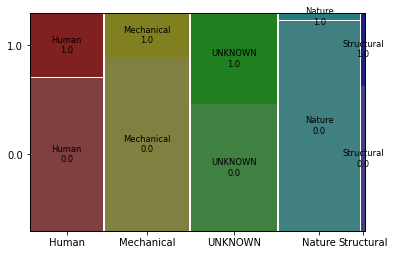

In [55]:
mosaic_df = raw_dataset[['CauseCategory', 'Transport Accident']].copy()
mosaic_df['Deaths'] = yDeath

mosaic(data=mosaic_df, index=['CauseCategory', 'Deaths'])
plt.show()

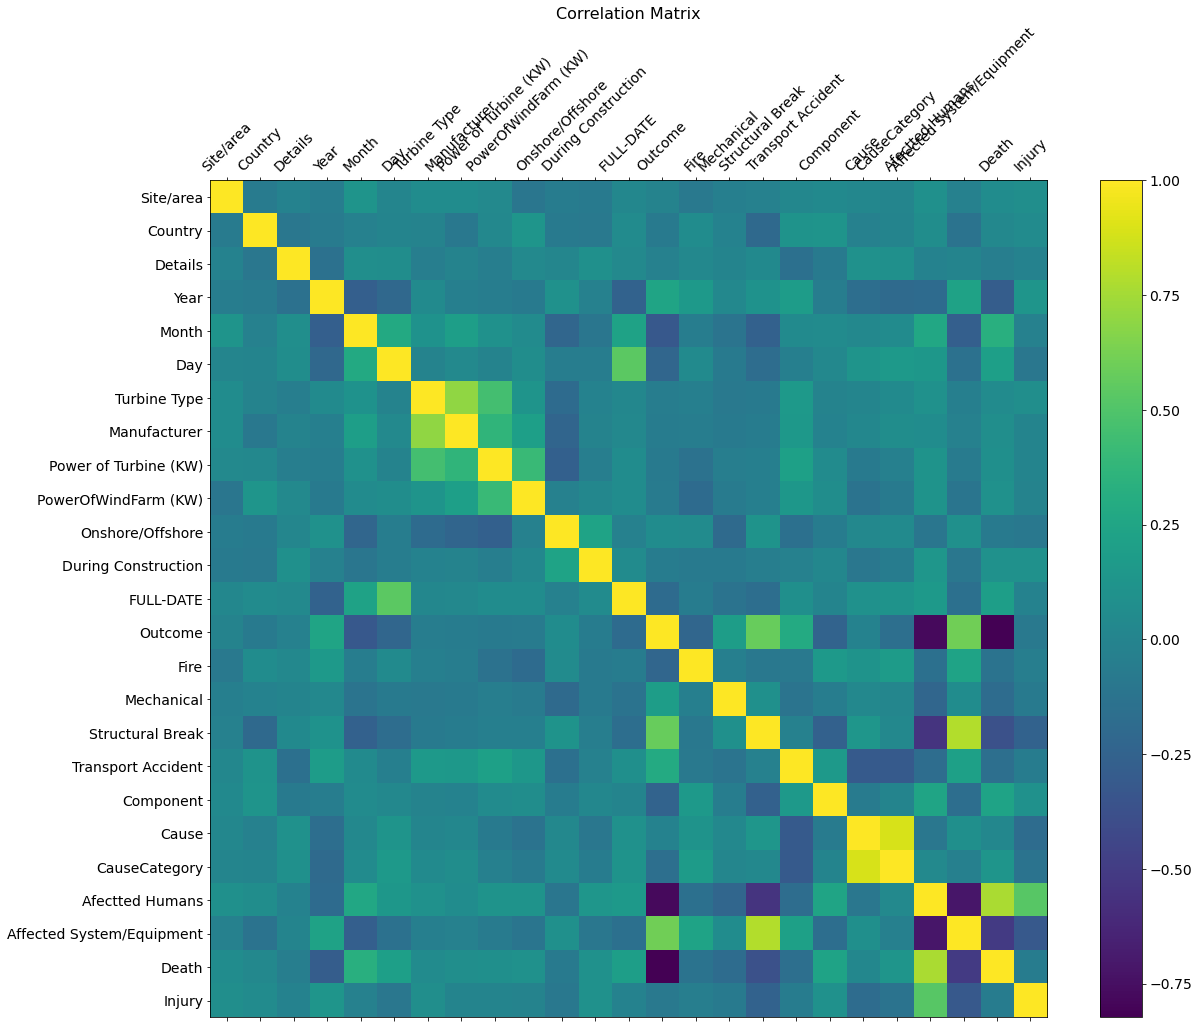

In [56]:
df_corrr = df
df_corrr["Death"] = yDeath
df_corrr["Injury"] = yInjury

cr_mtx = df_corrr.corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(cr_mtx, fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [57]:
upper = cr_mtx.where(np.triu(np.ones(cr_mtx.shape), k=1).astype(np.bool))
cr_mtx = upper.fillna(0)

In [58]:
lst = list(cr_mtx.columns.values)
c = []
for i in lst:
    for j in lst:
        if i != j and (cr_mtx[i][j] >= 0.2 or cr_mtx[i][j] <= -0.2) :
            c.append({i,j})

c            

[{'Month', 'Year'},
 {'Day', 'Year'},
 {'Day', 'Month'},
 {'Manufacturer', 'Turbine Type'},
 {'Power of Turbine (KW)', 'Turbine Type'},
 {'Manufacturer', 'Power of Turbine (KW)'},
 {'Manufacturer', 'PowerOfWindFarm (KW)'},
 {'Power of Turbine (KW)', 'PowerOfWindFarm (KW)'},
 {'Month', 'Onshore/Offshore'},
 {'Manufacturer', 'Onshore/Offshore'},
 {'Onshore/Offshore', 'Power of Turbine (KW)'},
 {'During Construction', 'Onshore/Offshore'},
 {'FULL-DATE', 'Year'},
 {'FULL-DATE', 'Month'},
 {'Day', 'FULL-DATE'},
 {'Outcome', 'Year'},
 {'Month', 'Outcome'},
 {'Day', 'Outcome'},
 {'Fire', 'Outcome'},
 {'Month', 'Structural Break'},
 {'Outcome', 'Structural Break'},
 {'Power of Turbine (KW)', 'Transport Accident'},
 {'Outcome', 'Transport Accident'},
 {'Component', 'Outcome'},
 {'Component', 'Structural Break'},
 {'Cause', 'Transport Accident'},
 {'CauseCategory', 'Transport Accident'},
 {'Cause', 'CauseCategory'},
 {'Afectted Humans', 'Month'},
 {'Afectted Humans', 'Outcome'},
 {'Afectted Huma

In [59]:
StatisticalTest = pd.DataFrame(columns=['Test No', 'Attribute1','Attribute2', 'Correlation', 'Test Performed' ,'p-Value', 'Result'])

for x in c :
    #print(x.pop() + "  " + x.pop())
    a = x.pop()
    b =x.pop()
    if  raw_dataset.dtypes[a] == np.object and raw_dataset.dtypes[b] == np.object :
        # Kolmogorov-Smirnov test
        res = stats.ks_2samp(df[a], df[b], alternative='less')
        if res[1] < 0.05 :
            ok = "-"  
        else :
            ok = "+"
        StatisticalTest.loc[len(StatisticalTest)] = [c.index(x) , a , b , cr_mtx[a][b], "K-S Test" , res[1], ok]
        
    elif raw_dataset.dtypes[a] == np.float64 and raw_dataset.dtypes[b] == np.float64 :
        
        dfDropNa = df.dropna()
        
        res = stats.chi2_contingency(pd.crosstab(dfDropNa[a], dfDropNa[b], margins = False))
        if res[1] < 0.05 :
            ok = "-"  
        else :
            ok = "+"
        StatisticalTest.loc[len(StatisticalTest)] = [c.index(x) , a , b , cr_mtx[a][b], "Chi Square Pearson Test" , res[1], ok]
        
    elif (raw_dataset.dtypes[a] == np.float64 and raw_dataset.dtypes[b] == np.object) or (raw_dataset.dtypes[a] == np.object and raw_dataset.dtypes[b] == np.float64):
        dfDropNa = df.dropna()     
        
        res = stats.shapiro(dfDropNa[[a, b]])
        if res[1] < 0.05 : 
            res1 = stats.ttest_ind(dfDropNa[a], dfDropNa[b])
            if res1[1] < 0.05 :
                    ok = "-"  
            else :
                ok = "+"
            StatisticalTest.loc[len(StatisticalTest)] = [c.index(x) , a , b , cr_mtx[a][b], "T-Test" , res[1], ok]
        else :
            res1 = stats.kruskal(dfDropNa[a], dfDropNa[b])
            if res1[1] < 0.05 :
                    ok = "-"  
            else :
                ok = "+"
            StatisticalTest.loc[len(StatisticalTest)] = [c.index(x) , a , b , cr_mtx[a][b], "Kruskal-Wallis Test" , res[1], ok]
    
StatisticalTest.sort_values('Correlation',ascending=[False] )

,Test No,Attribute1,Attribute2,Correlation,Test Performed,p-Value,Result
46,0,Death,Afectted Humans,0.771414,Chi Square Pearson Test,2.212245e-36,-
20,0,Structural Break,Outcome,0.577698,T-Test,4.255842e-27,+
49,0,Injury,Afectted Humans,0.529186,Chi Square Pearson Test,1.198460e-17,-
22,0,Transport Accident,Outcome,0.294711,T-Test,4.049380e-28,-
15,0,Outcome,Year,0.240322,K-S Test,3.473741e-01,+
33,0,Affected System/Equipment,Year,0.226886,T-Test,5.544653e-30,-
21,0,Transport Accident,Power of Turbine (KW),0.215851,T-Test,1.234211e-28,-
42,0,Death,Day,0.202599,T-Test,1.300828e-26,-
43,0,Outcome,Death,0.000000,T-Test,4.962551e-27,-
1,0,Year,Day,0.000000,K-S Test,7.854209e-14,-


In [60]:
RankingD = pd.DataFrame(columns=['Attribute', 'Values', 'Information Gain'])
i = 1

for cols in df.columns :
    res = sp.kl_div(df[cols] , yDeath)
    res = [x for x in res if str(x) != 'nan']
    res = [x for x in res if str(x) != 'inf']
    row = {'Attribute':cols, 'Values':max(Counter(res).values()), 'Information Gain':sum(res)/len(res)}
    RankingD = RankingD.append(row, ignore_index= True)
    

RankingD.sort_values('Information Gain', ascending=[False])
#RankingD.sort_index()

,Attribute,Values,Information Gain
13,Outcome,48,0.649163
22,Affected System/Equipment,52,0.469388
16,Structural Break,79,0.373016
2,Details,1,0.278826
15,Mechanical,177,0.265560
19,Cause,43,0.263250
17,Transport Accident,182,0.260163
14,Fire,181,0.255144
24,Injury,185,0.241803
10,Onshore/Offshore,157,0.237456


In [61]:
dfD = df[yDeath == 0]
dfD = dfD[[RankingD['Attribute'].iloc[0] , RankingD['Attribute'].iloc[1] , RankingD['Attribute'].iloc[2]
           , RankingD['Attribute'].iloc[3] , RankingD['Attribute'].iloc[4]]]
dfD.rank()


,Site/area,Country,Details,Year,Month
0,176.0,29.0,88.0,33.5,51.5
2,74.5,108.0,180.0,120.5,13.5
3,11.0,108.0,9.0,149.0,73.5
4,122.0,170.0,160.0,149.0,132.0
5,198.0,170.0,58.0,92.5,34.0
...,...,...,...,...,...
266,10.0,108.0,31.0,92.5,162.5
267,171.0,170.0,154.0,92.5,162.5
268,33.0,15.0,188.0,92.5,176.0
271,66.0,170.0,127.0,92.5,195.0


In [62]:
RankingI = pd.DataFrame(columns=['Attribute', 'Values', 'Information Gain'])
i = 1

for cols in df.columns :
    res = sp.kl_div(df[cols] , yInjury)
    res = [x for x in res if str(x) != 'nan']
    res = [x for x in res if str(x) != 'inf']
    row = {'Attribute':cols, 'Values':max(Counter(res).values()), 'Information Gain':sum(res)/len(res)}
    RankingI = RankingI.append(row, ignore_index= True)
    

RankingI.sort_values('Information Gain', ascending=[False])

,Attribute,Values,Information Gain
19,Cause,22,0.316509
2,Details,1,0.256862
22,Affected System/Equipment,68,0.252747
12,FULL-DATE,7,0.222014
20,CauseCategory,55,0.219063
16,Structural Break,93,0.211864
5,Day,15,0.211581
4,Month,30,0.180183
0,Site/area,4,0.179807
13,Outcome,22,0.155684


In [63]:
#Split the data into test and train
df = raw_dataset.copy()
df = df.dropna()
yDeath = df['Death']
yInjury = df['Injury']
df = df.drop('Death', axis=1)
df = df.drop('Injury', axis=1)

enc = OrdinalEncoder()
enc.fit(df[["Site/area","Country", "Details", "Year", "Month", "Day", "Turbine Type", "Manufacturer", "Power of Turbine (KW)", "PowerOfWindFarm (KW)", "Onshore/Offshore", "During Construction", "FULL-DATE", "Outcome", "Component", "Cause", "CauseCategory"]])
df[["Site/area","Country", "Details", "Year", "Month", "Day", "Turbine Type", "Manufacturer", "Power of Turbine (KW)", "PowerOfWindFarm (KW)", "Onshore/Offshore", "During Construction", "FULL-DATE", "Outcome", "Component", "Cause", "CauseCategory"]] = enc.transform(df[["Site/area","Country", "Details", "Year", "Month", "Day", "Turbine Type", "Manufacturer", "Power of Turbine (KW)", "PowerOfWindFarm (KW)", "Onshore/Offshore", "During Construction", "FULL-DATE", "Outcome", "Component", "Cause", "CauseCategory"]])
for cols in df.columns :
    df[cols] = (df[cols] - min(df[cols]))/( max(df[cols]) - min(df[cols]))

X_trainD, X_testD, y_trainD, y_testD = train_test_split(df, yDeath, test_size=0.33, random_state=42)
X_trainI, X_testI, y_trainI, y_testI = train_test_split(df, yInjury, test_size=0.33, random_state=42)

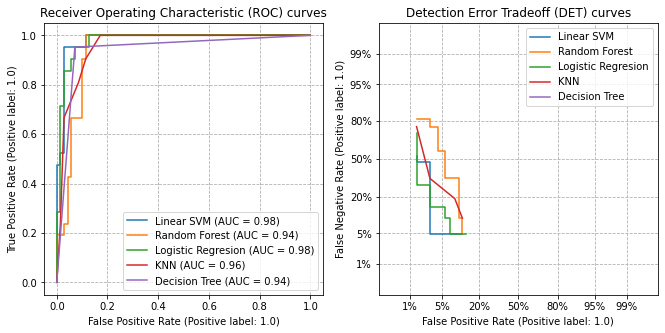

,Classifier,CA,AUC
0,Linear SVM,0.945055,0.947619
2,Logistic Regresion,0.934066,0.940476
4,Decision Tree,0.934066,0.940476
3,KNN,0.890110,0.861905
1,Random Forest,0.835165,0.692857


In [64]:
ClassifiersD = pd.DataFrame(columns=['Classifier', 'CA', 'AUC'])

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025)),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Logistic Regresion" : LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": tree.DecisionTreeClassifier()
}

# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_trainD, y_trainD)
    score = accuracy_score(y_testD, clf.predict(X_testD))
    roc = roc_auc_score(y_testD, clf.predict(X_testD))
    row = {'Classifier': name, 'CA':score, 'AUC':roc}
    ClassifiersD = ClassifiersD.append(row, ignore_index= True)

    RocCurveDisplay.from_estimator(clf, X_testD, y_testD, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_testD, y_testD, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()
ClassifiersD.sort_values('AUC',ascending=[False])

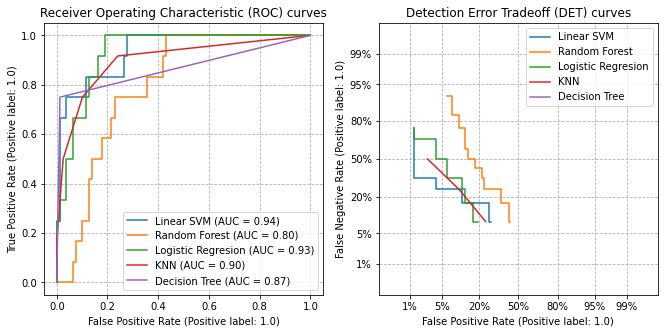

,Classifier,CA,AUC
4,Decision Tree,0.956044,0.868671
3,KNN,0.912088,0.737342
0,Linear SVM,0.912088,0.702004
2,Logistic Regresion,0.901099,0.625000
1,Random Forest,0.857143,0.493671


In [65]:
ClassifiersI = pd.DataFrame(columns=['Classifier', 'CA', 'AUC'])

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025)),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Logistic Regresion" : LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": tree.DecisionTreeClassifier()
}

# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_trainI, y_trainI)
    score = accuracy_score(y_testI, clf.predict(X_testI))
    roc = roc_auc_score(y_testI, clf.predict(X_testI))
    row = {'Classifier': name, 'CA':score, 'AUC':roc}
    ClassifiersI = ClassifiersI.append(row, ignore_index= True)

    RocCurveDisplay.from_estimator(clf, X_testI, y_testI, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_testI, y_testI, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()
ClassifiersI.sort_values('AUC',ascending=[False])

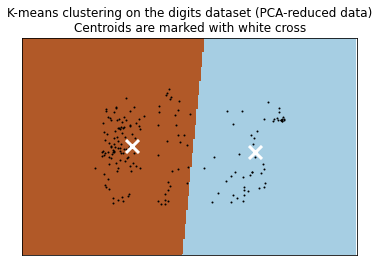

In [66]:
(n_samples, n_features), n_digits = X_trainD.shape, np.unique(y_trainD).size

reduced_data = PCA(n_components=2).fit_transform(X_trainD)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
labels_kmeans = kmeans.labels_

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

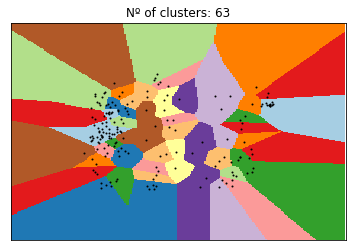

In [67]:
(n_samples, n_features), n_digits = X_trainD.shape, np.unique(y_trainD).size

reduced_data = PCA(n_components=2).fit_transform(X_trainD)

bandwidth = estimate_bandwidth(reduced_data, quantile=0.02, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(reduced_data)
labels_meanshift = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels_meanshift)
n_clusters_ = len(labels_unique)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

plt.title(
    "Nº of clusters: "+str(n_clusters_)
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Overfitting

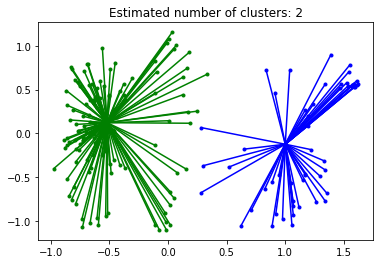

0.384437745716137


In [68]:
(n_samples, n_features), n_digits = X_trainD.shape, np.unique(y_trainD).size

reduced_data = PCA(n_components=2).fit_transform(X_trainD)

bandwidth = estimate_bandwidth(reduced_data, quantile=0.2, n_samples=500)

af = AffinityPropagation(preference=-50, random_state=0).fit(reduced_data)
cluster_centers_indices = af.cluster_centers_indices_
labels_affprp = af.labels_

n_clusters_ = len(cluster_centers_indices)

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels_affprp == k
    cluster_center = reduced_data[cluster_centers_indices[k]]
    plt.plot(reduced_data[class_members, 0], reduced_data[class_members, 1], col + ".")

    for x in reduced_data[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
print(metrics.silhouette_score(reduced_data, y_trainD, metric='euclidean'))

In [69]:
#print(metrics.silhouette_score(reduced_data, labels, metric='euclidean'))  overlapping
#print(davies_bouldin_score(reduced_data, labels))# (0 to 1) numero de clusters optimos, bajo mejor
#print(metrics.calinski_harabasz_score(reduced_data, labels)) #(0 to ...) clusters poco densos
#metrics.fowlkes_mallows_score(labels_kmeans, y_trainD) # calidad del clustering mas alto mejor

ClustersD = pd.DataFrame(columns=['Cluster', 'Fowlkes Mallows','Calinski Harabasz','Silhouette', 'Davies Bouldin'])

row = {'Cluster':"K-means", 'Fowlkes Mallows':metrics.fowlkes_mallows_score(labels_kmeans, y_trainD),'Silhouette':metrics.silhouette_score(reduced_data, labels_kmeans, metric='euclidean'), 'Davies Bouldin':davies_bouldin_score(reduced_data, labels_kmeans), 'Calinski Harabasz':metrics.calinski_harabasz_score(reduced_data, labels_kmeans)}
ClustersD = ClustersD.append(row, ignore_index= True)
row = {'Cluster':"Means Shift", 'Fowlkes Mallows':metrics.fowlkes_mallows_score(labels_meanshift, y_trainD),'Silhouette':metrics.silhouette_score(reduced_data, labels_meanshift, metric='euclidean'), 'Davies Bouldin':davies_bouldin_score(reduced_data, labels_meanshift), 'Calinski Harabasz':metrics.calinski_harabasz_score(reduced_data, labels_meanshift)}
ClustersD = ClustersD.append(row, ignore_index= True)
row = {'Cluster':"Affinity Propagation", 'Fowlkes Mallows':metrics.fowlkes_mallows_score(labels_affprp, y_trainD),'Silhouette':metrics.silhouette_score(reduced_data, labels_affprp, metric='euclidean'), 'Davies Bouldin':davies_bouldin_score(reduced_data, labels_affprp), 'Calinski Harabasz':metrics.calinski_harabasz_score(reduced_data, labels_affprp)}
ClustersD = ClustersD.append(row, ignore_index= True)


ClustersD

,Cluster,Fowlkes Mallows,Calinski Harabasz,Silhouette,Davies Bouldin
0,K-means,0.793070,233.972318,0.552504,0.725918
1,Means Shift,0.181967,563.294372,0.363000,0.455130
2,Affinity Propagation,0.797480,231.838908,0.543586,0.743614


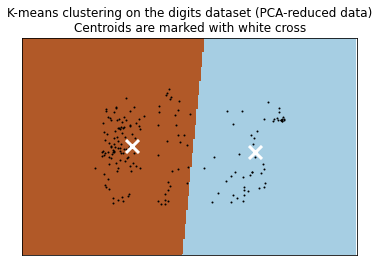

In [70]:
(n_samples, n_features), n_digits = X_trainD.shape, np.unique(y_trainD).size

reduced_data = PCA(n_components=2).fit_transform(X_trainI)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
labels_kmeans = kmeans.labels_

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

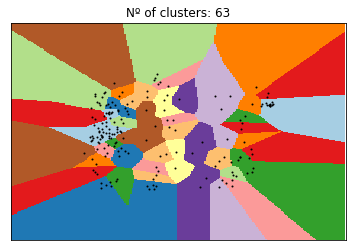

In [71]:
(n_samples, n_features), n_digits = X_trainI.shape, np.unique(y_trainI).size

reduced_data = PCA(n_components=2).fit_transform(X_trainI)

bandwidth = estimate_bandwidth(reduced_data, quantile=0.02, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(reduced_data)
labels_meanshift = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels_meanshift)
n_clusters_ = len(labels_unique)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

plt.title(
    "Nº of clusters: "+str(n_clusters_)
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Overfitting

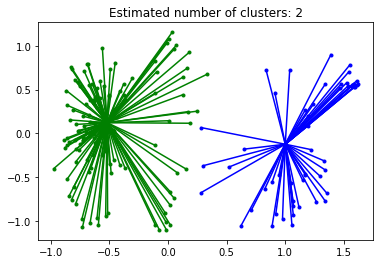

0.384437745716137


In [72]:
(n_samples, n_features), n_digits = X_trainI.shape, np.unique(y_trainI).size

reduced_data = PCA(n_components=2).fit_transform(X_trainI)

bandwidth = estimate_bandwidth(reduced_data, quantile=0.2, n_samples=500)

af = AffinityPropagation(preference=-50, random_state=0).fit(reduced_data)
cluster_centers_indices = af.cluster_centers_indices_
labels_affprp = af.labels_

n_clusters_ = len(cluster_centers_indices)

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels_affprp == k
    cluster_center = reduced_data[cluster_centers_indices[k]]
    plt.plot(reduced_data[class_members, 0], reduced_data[class_members, 1], col + ".")

    for x in reduced_data[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
print(metrics.silhouette_score(reduced_data, y_trainD, metric='euclidean'))

In [73]:
#print(metrics.silhouette_score(reduced_data, labels, metric='euclidean'))  overlapping
#print(davies_bouldin_score(reduced_data, labels))# (0 to 1) numero de clusters optimos, bajo mejor
#print(metrics.calinski_harabasz_score(reduced_data, labels)) #(0 to ...) clusters poco densos
#metrics.fowlkes_mallows_score(labels_kmeans, y_trainD) # calidad del clustering mas alto mejor

ClustersI = pd.DataFrame(columns=['Cluster', 'Fowlkes Mallows','Calinski Harabasz','Silhouette', 'Davies Bouldin'])

row = {'Cluster':"K-means", 'Fowlkes Mallows':metrics.fowlkes_mallows_score(labels_kmeans, y_trainI),'Silhouette':metrics.silhouette_score(reduced_data, labels_kmeans, metric='euclidean'), 'Davies Bouldin':davies_bouldin_score(reduced_data, labels_kmeans), 'Calinski Harabasz':metrics.calinski_harabasz_score(reduced_data, labels_kmeans)}
ClustersI = ClustersD.append(row, ignore_index= True)
row = {'Cluster':"Means Shift", 'Fowlkes Mallows':metrics.fowlkes_mallows_score(labels_meanshift, y_trainI),'Silhouette':metrics.silhouette_score(reduced_data, labels_meanshift, metric='euclidean'), 'Davies Bouldin':davies_bouldin_score(reduced_data, labels_meanshift), 'Calinski Harabasz':metrics.calinski_harabasz_score(reduced_data, labels_meanshift)}
ClustersI = ClustersD.append(row, ignore_index= True)
row = {'Cluster':"Affinity Propagation", 'Fowlkes Mallows':metrics.fowlkes_mallows_score(labels_affprp, y_trainI),'Silhouette':metrics.silhouette_score(reduced_data, labels_affprp, metric='euclidean'), 'Davies Bouldin':davies_bouldin_score(reduced_data, labels_affprp), 'Calinski Harabasz':metrics.calinski_harabasz_score(reduced_data, labels_affprp)}
ClustersI = ClustersD.append(row, ignore_index= True)


ClustersI

,Cluster,Fowlkes Mallows,Calinski Harabasz,Silhouette,Davies Bouldin
0,K-means,0.746580,233.972318,0.552504,0.725918
1,Means Shift,0.164387,563.294372,0.363000,0.455130
2,Affinity Propagation,0.740729,231.838908,0.543586,0.743614


In [74]:
rank = pd.DataFrame(columns=['Feature', 'Rank'])


rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rf.fit(X_trainD, y_trainD)

for cl in X_trainD.columns:
    row = {'Feature': cl, 'Rank': rf.feature_importances_[X_trainD.columns.get_loc(cl)]}
    rank = rank.append(row, ignore_index=True)

#The higher, the more important the feature. 
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
#It is also known as the Gini importance.
rank.sort_values('Rank', ascending=[False])

,Feature,Rank
13,Outcome,0.229626
21,Afectted Humans,0.112967
2,Details,0.100791
5,Day,0.071199
22,Affected System/Equipment,0.063794
3,Year,0.058399
12,FULL-DATE,0.055855
9,PowerOfWindFarm (KW),0.044013
19,Cause,0.035829
18,Component,0.035060
